<a href="https://colab.research.google.com/github/sightes/COFFETALKS/blob/main/desafio_latam_arrestos_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
%%capture
!pip install polygon-geohasher
!pip install geopandas
!pip install rtree


In [7]:
!pip install contextily 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 KB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 19.3 MB/s eta 0:00:00


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msngo
from shapely.geometry import Point
from geopandas import GeoSeries, GeoDataFrame
import geopandas as gpd
import contextily as cx
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (10, 6)
import pandas as pd


In [16]:
import numpy as np

In [13]:
def del_first_zero(string):

    '''
    Función que elimina el primero cero de una cadena de carácteres si cumple la condición.

    Parámetros
    ----------
    string: Cadena de carácteres.

    Returns
    -------
    String
        string: Cadena de carácteres sin el primer cero.
    '''

    check = '0'

    if check == string[0]:
        string = string[1:]      
          
    return string

In [24]:
df=pd.DataFrame([['1013067','238633','BRONX','Y'],['1012043','212157','QUEENS','Y']],columns=['xcoord','ycoord','city','arstmade'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   xcoord  2 non-null      int64 
 1   ycoord  2 non-null      int64 
 2   city    2 non-null      object
dtypes: int64(2), object(1)
memory usage: 64.0+ bytes


Text(0.5, 1.0, 'Geográfico de Arrestos')

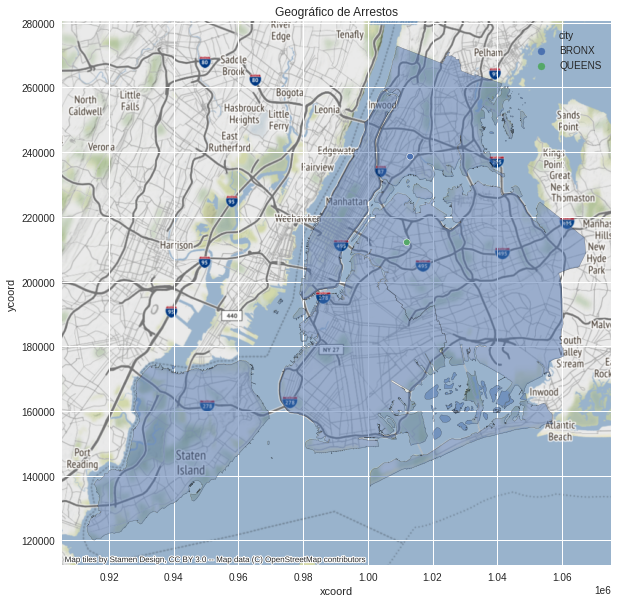

In [29]:

geo_arstmade = df[df['arstmade']=='Y'][['xcoord','ycoord','city']]
geo_arstmade['xcoord'] = geo_arstmade['xcoord'].apply(del_first_zero)
geo_arstmade['ycoord'] = geo_arstmade['ycoord'].apply(del_first_zero)
geo_arstmade['xcoord'] = np.where(geo_arstmade['xcoord']==' ', np.nan, geo_arstmade['xcoord'])
geo_arstmade['ycoord'] = np.where(geo_arstmade['ycoord']==' ', np.nan, geo_arstmade['ycoord'])
geo_arstmade = geo_arstmade.dropna()


geo_arstmade['xcoord'] = geo_arstmade['xcoord'].astype('int64')
geo_arstmade['ycoord'] = geo_arstmade['ycoord'].astype('int64')
geo_arstmade.info()


df_geo = gpd.read_file(gpd.datasets.get_path('nybb'))
df_wm = df_geo.to_crs(epsg=3857)
ax = df_geo.plot(figsize=(15, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax, crs=df_geo.crs)
sns.scatterplot(data=geo_arstmade, x='xcoord', y='ycoord', hue='city', marker='o', s=45)
plt.title('Geográfico de Arrestos')

In [26]:
geo_arstmade

,xcoord,ycoord,city
0,1013067,238633,BRONX
1,1012043,212157,QUEENS
